In [5]:
# !pip install -r requirements.txt #uncomment to install all required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn import cluster
# import tests
# from pathlib import Path
# import librosa

path = '/Users/baonguyen/Desktop/CSCI 4622/project/Data/features_3_sec.csv'
data = pd.read_csv(path)
genres = data['label'].unique()
# print(np.where(genres == 'blues')[0][0])

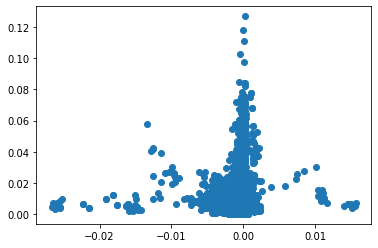

In [6]:
genres = data['label'].unique()
combined = np.asarray(data[['harmony_mean', 'harmony_var']].values.tolist())
# plt.set_title(name)
plt.scatter(combined[:, 0], combined[:, 1])
plt.show()

In [13]:
file = '/Users/baonguyen/Desktop/CSCI 4622/project/Data'
OUTPUT_PATH = Path(file).parent
# ASSETS_PATH = OUTPUT_PATH / Path("./assets")
print(OUTPUT_PATH)

NameError: name 'Path' is not defined

In [7]:
class KMeans:
    def __init__(self, k, rtol=1e-3):
        """
        :param k: (int) number of means/centroids to evaluate
        :param rtol: (float) relative tolerance, `epsilon` from the markdown
        """
        self.k = k
        self.centroids = None
        self.snapshots = []  # buffer for progress plots
        self.rtol = rtol

    def initialize_centroids(self, X):
        """
        Randomly select k **distinct** samples from the dataset in X as centroids
        @param X: np.ndarray of dimension (num_samples, num_features)
        @return: centroids array of shape (k, num_features)
        """
        centroids = None
        # Workspace 1.1
        #BEGIN 
        # code here

        centroids = np.zeros([self.k, X.shape[1]]) # init

        for k in range(centroids.shape[0]):
            x = np.random.choice(range(X.shape[0]), size=1) # randomly
            if X[x] not in centroids: # if x isn't repeated
                centroids[k] = X[x]
            else: # find another X[x]
                continue
        
        # self.centroids = centroids # store centroids
        # print(centroids)

        #END
        return centroids

    def compute_distances(self, X):
        """
        Compute a distance matrix of size (num_samples, k) where each cell (i, j) represents the distance between
        i-th sample and j-th centroid. We shall use Euclidean distance here.
        :param X: np.ndarray of shape (num_samples, num_features)
        :return: distances_matrix : (np.ndarray) of the dimension (num_samples, k)
        """
        distances_matrix = np.zeros((X.shape[0], self.k))
        # Workspace 1.2
        #BEGIN 
        # code here

        # centroids = self.initialize_centroids(X)

        for i in range(X.shape[0]):
            for j in range(self.centroids.shape[0]):
                
                temp = X[i] - self.centroids[j]
                dis = np.sqrt(np.dot(temp.T, temp))
                # print(dis)

                distances_matrix[i][j] = dis

        # print(distances_matrix)

        #END
        return distances_matrix

    @staticmethod
    def compute_assignments(distances_to_centroids):
        """
        Compute the assignment array of shape (num_samples,) where assignment[i] = j if and only if
        sample i belongs to the cluster of centroid j
        :param distances_to_centroids: The computed pairwise distances matrix of shape (num_samples, k)
        :return: assignments array of shape (num_samples,)
        """

        assignments = np.zeros((distances_to_centroids.shape[0],))

        # Workspace 1.3
        #BEGIN 
        # code here

        for i in range(len(assignments)):
            assignments[i] = np.argmin(distances_to_centroids[i])

        # print(assignments.astype(int))

        #END
        return assignments.astype(int)

    def compute_centroids(self, X, assignments):
        """
        Given the assignments array for the samples, compute the new centroids
        :param X: data matrix of shape (num_samples, num_features)
        :param assignments: array of shape (num_samples,) where assignment[i] is the current cluster of sample i
        :return: The new centroids array of shape (k, num_features)
        """
        # Workspace 1.4
        centroids = np.zeros((self.k, X.shape[1]))
        #BEGIN 
        # code here

        for k in range(self.k):

            tot = np.zeros([X.shape[1],])
            count = 0

            for a in range(len(assignments)):
                if assignments[a] == k:
                    tot += X[a]
                    count += 1

            centroids[k] = tot/count

        # print(len(centroids))

        #END
        return centroids

    def compute_objective(self, X, assignments):
        return np.sum(np.linalg.norm(X - self.centroids[assignments], axis=1) ** 2)

    def fit(self, X):
        """
        Implement the K-means algorithm here as described above. Loop until the improvement ratio of the objective
        is lower than rtol. At the end of each iteration, save the k-means objective and return the objective values
        at the end

        @param X:
        @return:
        """
        self.centroids = self.initialize_centroids(X)
        objective = np.inf
        assignments = np.zeros((X.shape[0],))
        history = []

        # Workspace 1.5

        while True:
            # self.save_snapshot(X, assignments)
            #BEGIN 
            # code here

            distances_matrix = self.compute_distances(X)
            assignments = self.compute_assignments(distances_matrix)
            # self.centroids = self.compute_centroids(X, assignments)

            if objective == np.inf:
                objective = self.compute_objective(X, assignments)
                history.append(objective)
                    
            self.centroids = self.compute_centroids(X, assignments)
            improvement = np.abs(self.compute_objective(X, assignments) - objective)/objective
            history.append(improvement)
            objective = self.compute_objective(X, assignments)

            if improvement < self.rtol: # Loop until the improvement ratio of the objective is lower than rtol
                break

        # print(history)

            #END
        return history

    def predict(self, X):
        # Workspace 1.6
        assignments = np.zeros((X.shape[0],))
        #BEGIN |
        # code here

        distances_matrix = self.compute_distances(X)
        assignments = self.compute_assignments(distances_matrix)

        #END
        return assignments

    # def save_snapshot(self, X, assignments):
    #     """
    #     Saves plot image of the current asssignments
    #     """
    #     if X.shape[1] == 2:
    #         self.snapshots.append(tests.create_buffer(X, assignments))

In [4]:
# Fit a KMeans model with $k$ = # of unique lables. 
k = len(np.unique(dataset.y_train))
k_means = KMeans(k)
history = k_means.fit(dataset.X_train)

    # Produce a scatter plot of the data points and color the points according to their *predicted labels*.
axs[i].set_title(name)
axs[i].scatter(dataset.X_train[:, 0], dataset.X_train[:, 1], c = k_means.predict(dataset.X_train))

    centroids = k_means.compute_centroids(dataset.X_train, k_means.predict(dataset.X_train))
axs[i].scatter(centroids[:, 0], centroids[:, 1], color="red")

NameError: name 'combined' is not defined